In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np
# import os 
# from scipy.sparse import coo_matrix

In [6]:
df = pd.read_csv(r"C:\Users\Shikha\Desktop\datasets\marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv", sep ='\t')
df.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [7]:
# Selecting necessary features only
df1 = df.filter(['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags'])
df1.head()

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,NaN,NaN,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [42]:
df1.to_csv('df1.csv')

In [8]:
df1.shape

(5000, 10)

In [9]:
#finding the missing values
df1.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [10]:
# filling all the missing values
df1[['Product Rating','Product Reviews Count','Product Category','Product Brand','Product Description']]=df1[['Product Rating','Product Reviews Count','Product Category','Product Brand','Product Description']].fillna(0)

In [11]:
df1.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [12]:
# check the duplicate values
df1.duplicated().sum()

np.int64(0)

In [13]:
# rename the columns 
col_name_mapping = { 'Uniq Id': 'ID',
                    'Product Id': 'ProdID',
                    'Product Rating': 'Rating',
                    'Product Reviews Count': 'ReviewCount',
                    'Product Category': 'Category',
                    'Product Brand': 'Brand',
                    'Product Name': 'Name',
                    'Product Image Url': 'ImageURL',
                    'Product Description': 'Description',
                    'Product Tags': 'Tags',
                    'Product Contents': 'Contents'}
df1.rename(columns = col_name_mapping, inplace = True) 

In [14]:
df1.head(2)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           5000 non-null   object 
 1   ProdID       5000 non-null   object 
 2   Rating       5000 non-null   float64
 3   ReviewCount  5000 non-null   float64
 4   Category     5000 non-null   object 
 5   Brand        5000 non-null   object 
 6   Name         5000 non-null   object 
 7   ImageURL     5000 non-null   object 
 8   Description  5000 non-null   object 
 9   Tags         5000 non-null   object 
dtypes: float64(2), object(8)
memory usage: 390.8+ KB


In [16]:
df1['ID'] =  df1['ID'].astype(str)

In [17]:
# extract the digits from id and  and prod id
df1['ID'] =  df1['ID'].str.extract(r'(\d+)').astype(float)
df1['ProdID'] =  df1['ProdID'].str.extract(r'(\d+)').astype(float)

In [18]:
df1.head(2)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."


EDA

In [19]:
# Basic statistics
num_users = df1['ID'].nunique()
num_items = df1['ProdID'].nunique()
num_ratings = df1['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1721
Number of unique items: 1697
Number of unique ratings: 36


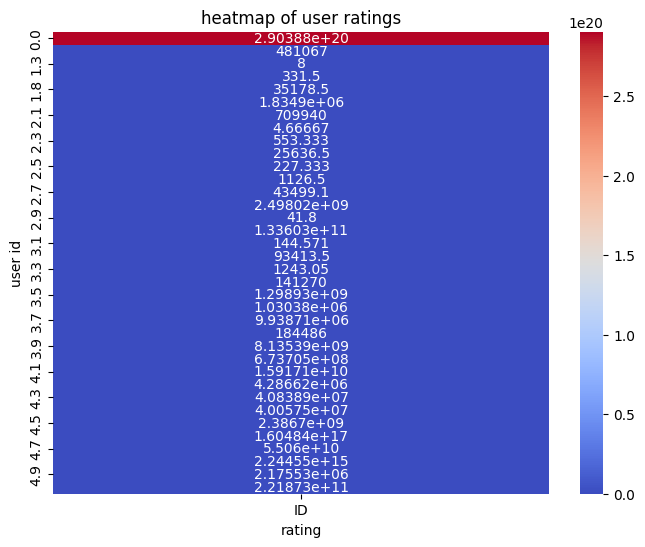

In [20]:
# plotting a heat map to see the rating as per userid
heatmap_data = df1.pivot_table("ID","Rating")
plt.figure(figsize = (8,6))
sns.heatmap(heatmap_data, annot = True, fmt = 'g' , cmap = 'coolwarm' , cbar=True)
plt.title('heatmap of user ratings')
plt.xlabel('rating')
plt.ylabel('user id')
plt.show()

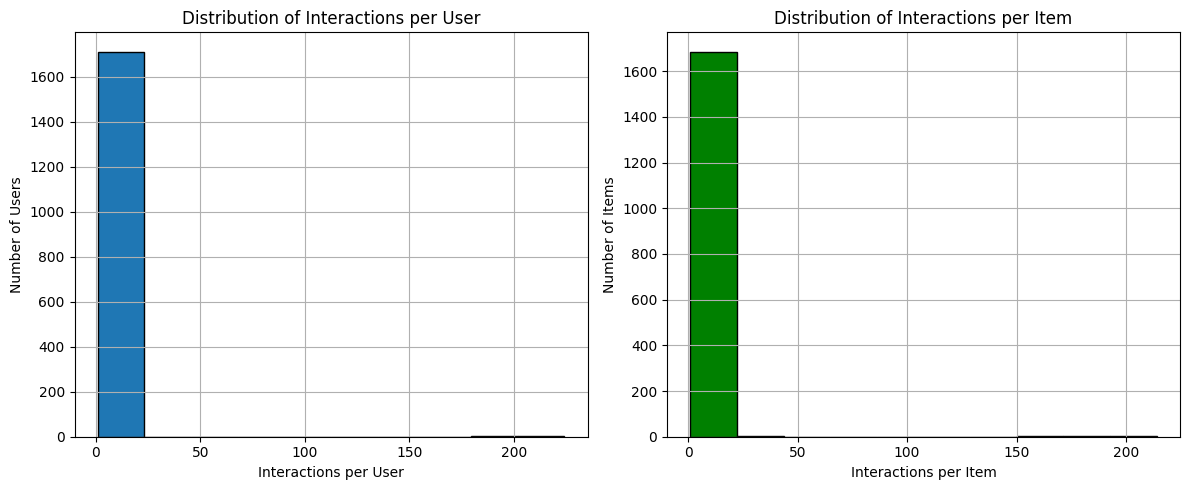

In [21]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df1['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
df1['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'most popular items')

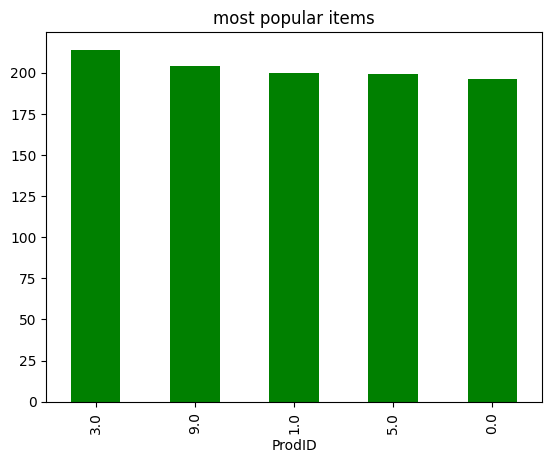

In [22]:
# most popular items
pop_items = df1['ProdID'].value_counts().head()
pop_items.plot(kind = 'bar' , color = 'green')
plt.title('most popular items')

<Axes: xlabel='Rating'>

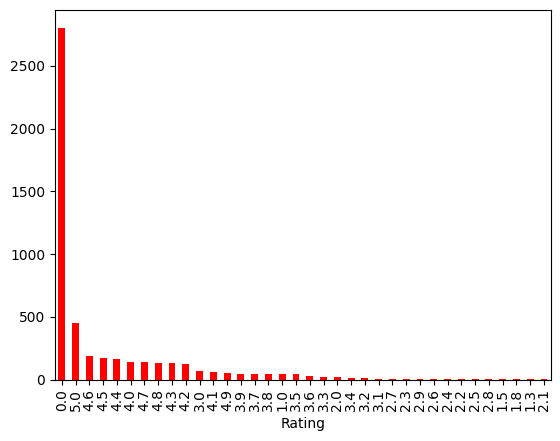

In [23]:
# most rated counts
df1['Rating'].value_counts().plot(kind = 'bar', color = 'red')

Data Cleaning and tag creations

In [24]:
# removing the stop_words(is, am , are)
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.cli import download
download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    if pd.isna(text):
        return ''
    text = str(text)
    doc = nlp(text)
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    df1[column] = df1[column].apply(clean_and_extract_tags)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [25]:

# Concatenate the cleaned tags from all relevant columns
df1['Tags'] = df1[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [26]:
df1.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"Premium, Beauty, Premium, Makeup, Premium, Nai...",OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,0,"Premium, Beauty, Premium, Makeup, Premium, Nai..."
1,9.500000e+01,76.0,0.0,0.0,"Beauty, Hair, Care, Hair, Color, Auburn, Hair,...",Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"Pack, 3, Pack, 3, UPC, 381519000201, Beautiful...","Beauty, Hair, Care, Hair, Color, Auburn, Hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"Beauty, Hair, Care, Hair, Color, Permanent, Ha...",Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"This, Clairol, Nice, N, Easy, Permanent, Color...","Beauty, Hair, Care, Hair, Color, Permanent, Ha..."
3,4.000000e+00,3.0,0.0,0.0,"Beauty, Makeup, Lip","Kokie, Cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"Calling, matte, lip, lovers, Indulge, rich, cr...","Beauty, Makeup, Lip, Kokie, Cosmetics, Calling..."
4,9.900000e+02,3.0,0.0,131.0,"Seasonal, Stock, Up, Essentials, Personal, Car...",Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In, 1971, Gillette, introduced, Trac, II, razo...","Seasonal, Stock, Up, Essentials, Personal, Car..."


Rating base Recommendations System

In [27]:
average_ratings = df1.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [28]:
# finding the top ratings
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [29]:
#changing the top ratings to int datatype
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


C:\Users\Shikha\AppData\Local\Temp\ipykernel_20244\1057016275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
C:\Users\Shikha\AppData\Local\Temp\ipykernel_20244\1057016275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)
C:\Users\Shikha\AppData\Local\Temp\ipykernel_20244\1057016275.py:5: SettingWithCopyWarning: 
A val

,Name,ReviewCount,Brand,ImageURL,Rating
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1,"Peter, Thomas, Roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5
4959,got2b Kinkier Curling Mousse 8 oz (Pack of 2),1,göt2b,https://i5.walmartimages.com/asr/9e656b95-79f6...,5
6,($14 Value) Burts Bees Beeswax Bounty Classic ...,10,"Burt, Bees",https://i5.walmartimages.com/asr/bfbb58dc-8199...,5
1208,Clairol Professional Beautiful Collection Semi...,1,Clairol,https://i5.walmartimages.com/asr/31562542-b683...,5
1216,"Clairol Textures & Tones 4RC Cherrywood, 1 ea ...",1,Clairol,https://i5.walmartimages.com/asr/78f33717-0104...,5
1228,Clay-Park Labs Ammonium Lactate Lotion 12% 14 ...,13,"Clay, Park, Labs",https://i5.walmartimages.com/asr/b3d5462d-d067...,5
4857,"Yosoo Reusable Sanitary Pads with Wings, 9 Typ...",1,Yosoo,https://i5.walmartimages.com/asr/5645ee43-e26f...,5
4862,ZINSSER & CO Jomax 1-Qt. Mold & Mildew Stain R...,1,JOMAX,https://i5.walmartimages.com/asr/d04c8d61-023a...,5
4892,"all Free Clear For Sensitive Skin, 110 Loads, ...",4,,https://i5.walmartimages.com/asr/9ccd3c7b-f479...,5
33,($55 Value) Clarins Multi-Active Day Face Crea...,2,Clarins,https://i5.walmartimages.com/asr/894b62ab-76d2...,5


Content Base Recommendation system (User Preferences or Items similarities)


In [30]:
#step1 calculate tfidf for each word in tag column
from sklearn.feature_extraction.text import TfidfVectorizer

def content_based_recommendations(df1,item_name , top_n = 10):
    #check if the item name dont exist in the training data
    if item_name not in df1['Name'].values:
        print(f"item {item_name} not found in training data")

    tfidf_vectorizer = TfidfVectorizer(stop_words='english') # tfidf will not apply on stop_words
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(df1['Tags']) # converted text data in to vectors in numerical form

    # step2 calculate cosine similarity of tag column  between each and every row/document of tag column 
    cosine_sim_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

    # testing the recommendations are coming proper

    #find the index of the searched item
    item_index = df1[df1['Name']==item_name].index[0]

    #get the cosine similarity score of item
    similar_items = list(enumerate(cosine_sim_content[item_index]))

    #sort the similar items by similarity score in descending order to get higher similar scores
    similar_items = sorted(similar_items,key = lambda x: x[1],reverse=True)

    # get the top n most similar items (excluding itself)
    top_sim_items = similar_items[1:top_n+1]

    #getting the index of top most similar items
    recommend_item_index = [x[0] for x in top_sim_items]

    # get the details of the similar items 
    recommend_item_details = df1.iloc[recommend_item_index][['Name','ReviewCount','Brand','ImageURL', 'Rating']]
    return recommend_item_details.head(10)

In [31]:
df1['Name'][3]

'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'

In [33]:
# testing the content based recommendation for specific item
item_name = input("enter your input")
content_based_rec = content_based_recommendations(df1,item_name,top_n = 8)
content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"Kokie, Cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"Kokie, Cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"Kokie, Cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,Colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"Kokie, Cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,Cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,Paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
3023,Be Matte Lipstick - Pink,2.0,"City, Color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0


Collbarative filtering

In [34]:
#step1 
#making the user rating matrix (rows = userid , cols =- prodid)
user_item_matrix = df1.pivot_table(index='ID',columns='ProdID',values='Rating',aggfunc='mean').fillna(0).astype(int)
user_item_matrix

ProdID,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,1.007940e+42,1.007940e+42,1.008730e+42,1.030521e+42,1.030521e+42,1.030521e+42,1.076430e+42,3.002240e+42,5.002240e+42,5.005509e+42
ID,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,2,1,2,1,1,0,2,1,1,1,...,0,0,0,0,0,0,5,0,0,0
1.000000e+00,1,0,2,2,0,2,3,2,0,2,...,0,4,0,0,5,0,0,0,0,0
2.000000e+00,1,1,3,1,2,1,0,2,1,1,...,0,3,0,0,0,0,0,0,0,4
3.000000e+00,1,1,1,2,0,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4.000000e+00,3,0,2,1,1,1,0,2,1,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.967409e+13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.094514e+14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.007694e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
#step2
#calculate the cosine similarity
user_similarities = cosine_similarity(user_item_matrix)
user_similarities

array([[1.        , 0.08328508, 0.08776176, ..., 0.        , 0.03388371,
        0.        ],
       [0.08328508, 1.        , 0.09334828, ..., 0.        , 0.        ,
        0.        ],
       [0.08776176, 0.09334828, 1.        , ..., 0.        , 0.0417756 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.03388371, 0.        , 0.0417756 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [36]:
# step3
#calculate the similarity for target user with all users
target_user_id = int(input("enter user_id"))
target_user_index = user_item_matrix.index.get_loc(target_user_id)
target_user_similarity = user_similarities[target_user_index]
print("target user similarity",target_user_similarity)

# getting the index of similar users with target user
similar_user_index = target_user_similarity.argsort()[::-1][1:]


target user similarity [0.0675362  0.0920999  0.044717   ... 0.         0.03691067 0.        ]


In [38]:
#function for above collabrative recommendations
def collaborative_filtering_recommendations(df1, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix
    # Calculate the user similarity matrix using cosine similarity
    user_similarities

    # Find the index of the target user in the matrix
    target_user_index

    # Get the similarity scores for the target user
    target_user_similarity 

    # Sort the users by similarity in descending order (excluding the target user)
    similar_user_index

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_user_index:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = df1[df1['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

# Example usage
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(df1, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,Clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,DenTek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,COVERGIRL,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,Neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"Design, Essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"Paul, Sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,Bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,Bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"AG, Hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,OPI,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


Hybrid Recommendations System

In [40]:
def hybrid_recommendations(df1,target_user_id,item_name,top_n=10):
    #get content based recommendations
    content_based_rec = content_based_recommendations(df1,item_name , top_n)

    # get collabrative filtering recommendations
    collabrative_filtering_rec = collaborative_filtering_recommendations(df1,target_user_id,top_n)

    #merge the recommendations
    hybrid_recc = pd.concat([content_based_rec,collaborative_filtering_rec]).drop_duplicates()
    return hybrid_recc.head(10)

In [41]:
#get hybrid recommendations  for a specific user and item
target_user_id = int(input('user id'))
item_name = input("enter item name")
hybrid_recc = hybrid_recommendations(df1,target_user_id , item_name , top_n=10)
print(f" top 10 hybrid recommendations for you{target_user_id} and item {item_name}")
hybrid_recc


 top 10 hybrid recommendations for you4 and item Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz


,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"Kokie, Cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"Kokie, Cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"Kokie, Cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,Colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"Kokie, Cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,Cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,Paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
3023,Be Matte Lipstick - Pink,2.0,"City, Color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0
4541,Be Matte Lipstick - Soft Pink,2.0,"City, Color",https://i5.walmartimages.com/asr/69e1ec63-be5e...,3.0
1315,Be Matte Lipstick - Baby Pink,2.0,"City, Color",https://i5.walmartimages.com/asr/acadf0c0-739f...,3.0


In [ ]:
import pickle

with open('recommderSystem.ipynb','r') as file:
    content = file.read()
with open("recommender.pkl" , 'wb') as f1:
    pickle.dump(content,f1)